In [2]:
import dxchange
import numpy as np
import matplotlib.pyplot as plt
from xlearn.utils import nor_data
from xlearn.utils import extract_3d
from xlearn.utils import img_window
from xlearn.classify import train

In [3]:
np.random.seed(1337)
dim_img = 128
patch_size = (dim_img, dim_img)
batch_size = 50
nb_classes = 2
nb_epoch = 12

number of convolutional filters to use

In [4]:
nb_filters = 32

size of pooling area for max pooling

In [5]:
nb_pool = 2

convolution kernel size

In [6]:
nb_conv = 3

Please download the test data from the classify_train folder at

http://tinyurl.com/APS-convnet

and put them in the test_data folder

In [9]:
fname = '../../test/test_data/center_test/1038.tiff'
img_x = dxchange.read_tiff(fname)

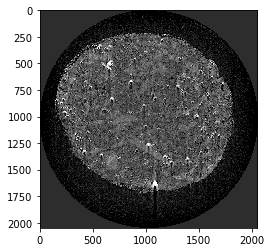

In [10]:
plt.imshow(img_x, cmap='Greys_r')
plt.clim(-0.0005,0.0028)
plt.show()

In [11]:
ind_uncenter1 = range(1038, 1047)
ind_uncenter2 = range(1049, 1057)
uncenter1 = dxchange.read_tiff_stack(fname, ind=ind_uncenter1, digit=4)
uncenter2 = dxchange.read_tiff_stack(fname, ind=ind_uncenter2, digit=4)
uncenter = np.concatenate((uncenter1, uncenter2), axis=0)
uncenter = nor_data(uncenter)

/home/yangx/anaconda3/lib/python3.6/site-packages/dxchange/reader.py:801: FutureWarning: The 'digit' argument is deprecated and no longer used.  It may be removed completely in a later version.
  FutureWarning)


In [12]:
uncenter = img_window(uncenter[:, 360:1460, 440:1440], 200)

In [13]:
uncenter_patches = extract_3d(uncenter, patch_size, 1)

In [14]:
np.random.shuffle(uncenter_patches)

In [17]:
center_img = dxchange.read_tiff('../../test/test_data/center_test/1048.tiff')

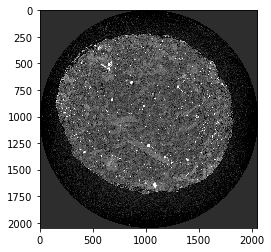

In [18]:
plt.imshow(center_img, cmap='Greys_r')
plt.clim(-0.0005,0.0028)
plt.show()

In [19]:
center_img = nor_data(center_img)

In [20]:
center_img = img_window(center_img[360:1460, 440:1440], 400)
center_patches = extract_3d(center_img, patch_size, 1)
np.random.shuffle(center_patches)

In [21]:
x_train = np.concatenate((uncenter_patches[0:50000], center_patches[0:50000]), axis=0)
x_test = np.concatenate((uncenter_patches[50000:60000], center_patches[50000:60000]), axis=0)
x_train = x_train.reshape(x_train.shape[0], dim_img, dim_img, 1)
x_test = x_test.reshape(x_test.shape[0], dim_img, dim_img, 1)
y_train = np.zeros(100000)
y_train[50000:99999] = 1
y_test = np.zeros(20000)
y_test[10000:19999] = 1

In [22]:
model = train(x_train, y_train, x_test, y_test, dim_img, nb_filters, nb_conv, batch_size, nb_epoch, nb_classes)

(100000, 128, 128, 1) (100000, 2) (20000, 128, 128, 1) (20000, 2)


/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:98: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="valid")`
/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:147: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 100000 samples, validate on 20000 samples
Epoch 1/12
100000/100000 [==============================] - 78s 779us/step - loss: 0.4420 - acc: 0.7551 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 2/12
100000/100000 [==============================] - 74s 743us/step - loss: 0.0699 - acc: 0.9883 - val_loss: 8.8269e-04 - val_acc: 1.0000
Epoch 3/12
100000/100000 [==============================] - 74s 740us/step - loss: 0.0386 - acc: 0.9946 - val_loss: 8.0603e-04 - val_acc: 1.0000
Epoch 4/12
100000/100000 [==============================] - 71s 706us/step - loss: 0.0312 - acc: 0.9964 - val_loss: 8.0602e-04 - val_acc: 1.0000
Epoch 5/12
100000/100000 [==============================] - 75s 748us/step - loss: 0.0378 - acc: 0.9952 - val_loss: 8.1183e-04 - val_acc: 1.0000
Epoch 6/12
100000/100000 [==============================] - 72s 724us/step - loss: 0.3171 - acc: 0.8508 - val_loss: 0.1881 - val_acc: 1.0000
Epoch 7/12
100000/100000 [==============================] - 73s 728us/step - loss: 0.09

TypeError: evaluate() got an unexpected keyword argument 'show_accuracy'

In [20]:
model.save_weights('classify_training_weights.h5')

[WARNING] classify_training_weights.h5 already exists - overwrite? [y/n]n
